# Timeseries Modeling 

This is a machine learning exploratory activity

(Data Science) -> Machine Learning -> (Artificial Intellence)

Using LSTM-based architectures to predict m future days based on n past days of time series data, where n > m

-- n > m, environment not chaning rapidly (consider increating m)

-- n = m, environment has small changes over in excess of m days

-- n < m, environment has significant changes during the prediction period (consider lowering m to a stable model period)


## Preprocess Climate Data

1. Build approach on Climate data from Jena, Germany

data => https://www.kaggle.com/datasets/stytch16/jena-climate-2009-2016


In [1]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./data/jena_climate_2009_2016.csv")
df

# The data is every 10 seconds

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [3]:
dataset = df[pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S').dt.minute == 00]
dataset

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.70
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.30
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.20
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.00
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420526,31.12.2016 20:00:00,1001.47,-1.52,271.52,-7.13,65.42,5.46,3.57,1.89,2.22,3.57,1282.60,1.24,1.96,232.00
420532,31.12.2016 21:00:00,1001.29,-3.09,269.98,-7.09,73.70,4.86,3.58,1.28,2.23,3.58,1289.78,0.61,1.48,207.50
420538,31.12.2016 22:00:00,1000.70,-2.59,270.51,-7.04,71.30,5.04,3.60,1.45,2.24,3.59,1286.67,0.38,0.72,8.15
420544,31.12.2016 23:00:00,1000.21,-3.76,269.39,-7.95,72.50,4.62,3.35,1.27,2.09,3.35,1291.71,0.89,1.30,223.70


In [4]:
# Add the time to index, but keep the time for analysis using cos sin
dataset.index = pd.to_datetime(dataset['Date Time'], format='%d.%m.%Y %H:%M:%S')
dataset

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.70
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.30
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.20
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.00
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 20:00:00,31.12.2016 20:00:00,1001.47,-1.52,271.52,-7.13,65.42,5.46,3.57,1.89,2.22,3.57,1282.60,1.24,1.96,232.00
2016-12-31 21:00:00,31.12.2016 21:00:00,1001.29,-3.09,269.98,-7.09,73.70,4.86,3.58,1.28,2.23,3.58,1289.78,0.61,1.48,207.50
2016-12-31 22:00:00,31.12.2016 22:00:00,1000.70,-2.59,270.51,-7.04,71.30,5.04,3.60,1.45,2.24,3.59,1286.67,0.38,0.72,8.15


In [5]:
# a quick plot to see what the data looks like
# nice cycles... need to try a cos sin analysis

temp = dataset[['T (degC)']]
temp

,T (degC)
Date Time,
2009-01-01 01:00:00,-8.05
2009-01-01 02:00:00,-8.88
2009-01-01 03:00:00,-8.81
2009-01-01 04:00:00,-9.05
2009-01-01 05:00:00,-9.63
...,...
2016-12-31 20:00:00,-1.52
2016-12-31 21:00:00,-3.09
2016-12-31 22:00:00,-2.59


<AxesSubplot:xlabel='Date Time'>

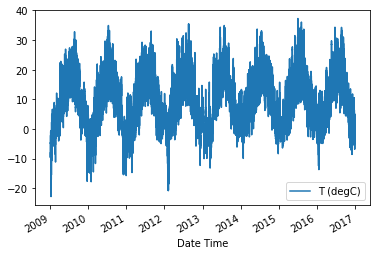

In [6]:
temp.plot()

## Predict the next m day's of temperature based on previous n days of temperature

### Format the data


In [7]:
# window_size = n days of previous temperatures
# prediction_size = m days of future temperature
# Create a data set in the format of...
# [[[1], [2], [3], [4], [5]]] [date6, 6 7 8]
# [[[2], [3], [4], [5], [6]]] [date7, 7 8 9]
# [[[3], [4], [5], [6], [7]]] [date8, 8 9 10]

def df_to_X_y(df, window_size=10, prediction_size=5):
    X = []
    y = []
    dates = []
    for i in range(df.shape[0]-window_size-prediction_size):
        row = df.iloc[i:i+window_size,0].values.flatten().tolist()
        X.append(row)

        date = df.index[i+window_size]
        
        yrow = df.iloc[i+window_size:i+window_size+prediction_size,:].values.flatten().tolist()
        label = [date, yrow ] # We capture the date of the prediction
        y.append(label)     

    return np.array(X), np.array(y)

In [89]:
# Set the previous n days to 5
WINDOW_SIZE = 5 #It was 10
PREDICTION_SIZE = 5

X1, y1 = df_to_X_y(temp, WINDOW_SIZE, PREDICTION_SIZE)
X1.shape, y1.shape

/var/folders/qc/c0srb4992vqgtrp3tw7125nh0000gn/T/ipykernel_22390/2708138863.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(X), np.array(y)


((70082, 5), (70082, 2))

In [90]:
X1

array([[-8.05, -8.88, -8.81, -9.05, -9.63],
       [-8.88, -8.81, -9.05, -9.63, -9.67],
       [-8.81, -9.05, -9.63, -9.67, -9.17],
       ...,
       [-1.19,  1.64,  3.97,  5.09,  2.87],
       [ 1.64,  3.97,  5.09,  2.87,  1.41],
       [ 3.97,  5.09,  2.87,  1.41, -0.08]])

In [91]:
y1

array([[Timestamp('2009-01-01 06:00:00'),
        list([-9.67, -9.17, -8.1, -7.66, -7.04])],
       [Timestamp('2009-01-01 07:00:00'),
        list([-9.17, -8.1, -7.66, -7.04, -7.41])],
       [Timestamp('2009-01-01 08:00:00'),
        list([-8.1, -7.66, -7.04, -7.41, -6.87])],
       ...,
       [Timestamp('2016-12-31 17:00:00'),
        list([1.41, -0.08, -1.03, -1.52, -3.09])],
       [Timestamp('2016-12-31 18:00:00'),
        list([-0.08, -1.03, -1.52, -3.09, -2.59])],
       [Timestamp('2016-12-31 19:00:00'),
        list([-1.03, -1.52, -3.09, -2.59, -3.76])]], dtype=object)

### Create datasets

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
# 80% training data used to create model
# 10% val data used in model validation
# 10% test datanever seen during model development

train_end1 = int(len(X1)*0.8)
test_end1 = int(len(X1)*0.9)

X_train1, y_train1 = X1[:train_end1], y1[:train_end1]
X_val1, y_val1 = X1[train_end1:test_end1], y1[train_end1:test_end1]
X_test1, y_test1 = X1[test_end1:], y1[test_end1:]

In [94]:
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((56065, 5), (56065, 2), (7008, 5), (7008, 2), (7009, 5), (7009, 2))

### Create LSTM Model

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import * # Yes, I am lazy :)
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [96]:
model1 = Sequential()
model1.add(InputLayer((WINDOW_SIZE, 1)))
model1.add(LSTM(64, return_sequences=True))
model1.add(LSTM(32))
model1.add(Dense(16, 'relu'))
model1.add(Dense(PREDICTION_SIZE, 'linear'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 5, 64)             16896     
                                                                 
 lstm_4 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 5)                 85        
                                                                 
Total params: 29,925
Trainable params: 29,925
Non-trainable params: 0
_________________________________________________________________


In [97]:
# Use ModelCheckpoint to save the best model
cp1 = ModelCheckpoint('model1_lstm_5d/', save_best_only=True)

# Create model
model1.compile(loss=MeanSquaredError(), 
               optimizer=Adam(learning_rate=0.0001), 
               metrics=[RootMeanSquaredError()])

In [98]:
# Fit the model
y_train1_d = np.array(y_train1[:,1].tolist())
y_val1_d = np.array(y_val1[:,1].tolist())
y_test1_d = np.array(y_test1[:,1].tolist())

In [99]:
# Don't need to necessarly normalize or scale the data (univariate)
history = model1.fit(X_train1, 
           y_train1_d, 
           validation_data=(X_val1, y_val1_d), 
           epochs=10, 
           callbacks=[cp1])

Epoch 1/10


2022-05-02 11:43:52.861110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 11:43:53.050617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 11:43:53.203096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 11:43:53.253375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 11:43:53.332805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1753/1753 [==============================] - ETA: 0s - loss: 70.5686 - root_mean_squared_error: 8.4005

2022-05-02 11:44:15.904374: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 11:44:15.973993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 11:44:15.997511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: model1_lstm_5d/assets


INFO:tensorflow:Assets written to: model1_lstm_5d/assets


1753/1753 [==============================] - 26s 14ms/step - loss: 70.5686 - root_mean_squared_error: 8.4005 - val_loss: 26.1816 - val_root_mean_squared_error: 5.1168
Epoch 2/10
1753/1753 [==============================] - ETA: 0s - loss: 10.4846 - root_mean_squared_error: 3.2380

INFO:tensorflow:Assets written to: model1_lstm_5d/assets


INFO:tensorflow:Assets written to: model1_lstm_5d/assets


1753/1753 [==============================] - 23s 13ms/step - loss: 10.4846 - root_mean_squared_error: 3.2380 - val_loss: 8.3110 - val_root_mean_squared_error: 2.8829
Epoch 3/10
1753/1753 [==============================] - ETA: 0s - loss: 5.8817 - root_mean_squared_error: 2.4252

INFO:tensorflow:Assets written to: model1_lstm_5d/assets


INFO:tensorflow:Assets written to: model1_lstm_5d/assets


1753/1753 [==============================] - 23s 13ms/step - loss: 5.8817 - root_mean_squared_error: 2.4252 - val_loss: 5.8241 - val_root_mean_squared_error: 2.4133
Epoch 4/10
1752/1753 [============================>.] - ETA: 0s - loss: 5.1354 - root_mean_squared_error: 2.2662

INFO:tensorflow:Assets written to: model1_lstm_5d/assets


INFO:tensorflow:Assets written to: model1_lstm_5d/assets


1753/1753 [==============================] - 23s 13ms/step - loss: 5.1357 - root_mean_squared_error: 2.2662 - val_loss: 5.1840 - val_root_mean_squared_error: 2.2768
Epoch 5/10
1753/1753 [==============================] - ETA: 0s - loss: 4.8679 - root_mean_squared_error: 2.2063

INFO:tensorflow:Assets written to: model1_lstm_5d/assets


INFO:tensorflow:Assets written to: model1_lstm_5d/assets


1753/1753 [==============================] - 24s 13ms/step - loss: 4.8679 - root_mean_squared_error: 2.2063 - val_loss: 4.8365 - val_root_mean_squared_error: 2.1992
Epoch 6/10
1753/1753 [==============================] - 22s 12ms/step - loss: 4.7434 - root_mean_squared_error: 2.1779 - val_loss: 4.9091 - val_root_mean_squared_error: 2.2157
Epoch 7/10
1750/1753 [============================>.] - ETA: 0s - loss: 4.6861 - root_mean_squared_error: 2.1647

INFO:tensorflow:Assets written to: model1_lstm_5d/assets


INFO:tensorflow:Assets written to: model1_lstm_5d/assets


1753/1753 [==============================] - 24s 14ms/step - loss: 4.6843 - root_mean_squared_error: 2.1643 - val_loss: 4.7334 - val_root_mean_squared_error: 2.1756
Epoch 8/10
1750/1753 [============================>.] - ETA: 0s - loss: 4.6326 - root_mean_squared_error: 2.1523

INFO:tensorflow:Assets written to: model1_lstm_5d/assets


INFO:tensorflow:Assets written to: model1_lstm_5d/assets


1753/1753 [==============================] - 24s 14ms/step - loss: 4.6338 - root_mean_squared_error: 2.1526 - val_loss: 4.6105 - val_root_mean_squared_error: 2.1472
Epoch 9/10
1750/1753 [============================>.] - ETA: 0s - loss: 4.6029 - root_mean_squared_error: 2.1454

INFO:tensorflow:Assets written to: model1_lstm_5d/assets


INFO:tensorflow:Assets written to: model1_lstm_5d/assets


1753/1753 [==============================] - 23s 13ms/step - loss: 4.6026 - root_mean_squared_error: 2.1454 - val_loss: 4.5923 - val_root_mean_squared_error: 2.1430
Epoch 10/10
1753/1753 [==============================] - 22s 12ms/step - loss: 4.5806 - root_mean_squared_error: 2.1402 - val_loss: 4.5955 - val_root_mean_squared_error: 2.1437


In [57]:
print(history.params)
print(history.history.keys())

{'verbose': 1, 'epochs': 15, 'steps': 1752}
dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


In [58]:
import matplotlib.pyplot as plt

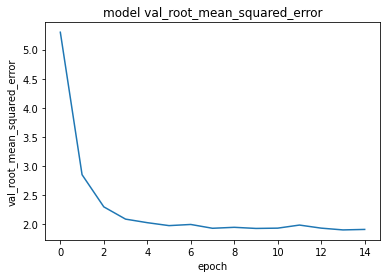

In [59]:
# summarize history for loss
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model val_root_mean_squared_error')
plt.ylabel('val_root_mean_squared_error')
plt.xlabel('epoch')
plt.show()

### Read the best model

In [60]:
from tensorflow.keras.models import load_model

In [61]:
# Load the best model
model1 = load_model('model1_lstm_5d/')

In [62]:
# Show how the model did against the train dataset
train_predictions1 = model1.predict(X_train1).flatten()

2022-05-02 11:11:04.901350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 11:11:04.961615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-02 11:11:04.989624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


## Create Results Set

In [63]:
# Grab the dates
df1 = pd.DataFrame(data={'Date': y_train1[:,0]})
df1

,Date
0,2009-01-01 11:00:00
1,2009-01-01 12:00:00
2,2009-01-01 13:00:00
3,2009-01-01 14:00:00
4,2009-01-01 15:00:00
...,...
56056,2015-05-24 13:00:00
56057,2015-05-24 14:00:00
56058,2015-05-24 15:00:00
56059,2015-05-24 16:00:00


In [83]:
X_train1

array([[-8.05, -8.88, -8.81, ..., -8.1 , -7.66, -7.04],
       [-8.88, -8.81, -9.05, ..., -7.66, -7.04, -7.41],
       [-8.81, -9.05, -9.63, ..., -7.04, -7.41, -6.87],
       ...,
       [11.26, 11.13, 11.56, ..., 15.62, 16.49, 17.16],
       [11.13, 11.56, 12.22, ..., 16.49, 17.16, 17.77],
       [11.56, 12.22, 13.22, ..., 17.16, 17.77, 19.4 ]])

In [81]:
y_train1_d

array([[-7.41, -6.87, -5.89, -5.94, -5.69],
       [-6.87, -5.89, -5.94, -5.69, -5.4 ],
       [-5.89, -5.94, -5.69, -5.4 , -5.37],
       ...,
       [17.77, 19.4 , 19.03, 18.46, 17.93],
       [19.4 , 19.03, 18.46, 17.93, 16.92],
       [19.03, 18.46, 17.93, 16.92, 15.82]])

In [64]:
# Get the actual temp for the range of predicted temps. The first predicted temp (t0) is that of the actual temp (t-1, t-2, ...t-m)
df2 = pd.DataFrame(y_train1_d[:,0], columns=['Actual Temp'])
df2

,Actual Temp
0,-7.41
1,-6.87
2,-5.89
3,-5.94
4,-5.69
...,...
56056,16.49
56057,17.16
56058,17.77
56059,19.40


In [65]:
train_predictions1_rs= train_predictions1.reshape(int(len(train_predictions1)/PREDICTION_SIZE), PREDICTION_SIZE)

In [66]:
df3 = pd.DataFrame(train_predictions1_rs, columns=['Pred Temp', 'Pred+1', 'Pred+2', 'Pred+3', 'Pred+4'])
df3

,Pred Temp,Pred+1,Pred+2,Pred+3,Pred+4
0,-6.536492,-6.038813,-6.021329,-5.598588,-5.927251
1,-7.565830,-7.604312,-7.867677,-7.650578,-7.862836
2,-6.649682,-6.466238,-6.578190,-6.253064,-6.495209
3,-5.411857,-5.014618,-5.002425,-4.604672,-4.930482
4,-6.004282,-6.047409,-6.257866,-6.107066,-6.315296
...,...,...,...,...,...
56056,16.203850,16.420460,16.574728,16.770542,16.548706
56057,16.997616,17.183653,17.277834,17.410334,17.147942
56058,17.520872,17.493212,17.318493,17.225418,16.760317
56059,17.871838,17.599892,17.113455,16.698965,16.037975


In [85]:
train_results1 = pd.concat([df1, df2, df3], axis = 1)
train_results1.head(6)

,Date,Actual Temp,Pred Temp,Pred+1,Pred+2,Pred+3,Pred+4
0,2009-01-01 11:00:00,-7.41,-6.536492,-6.038813,-6.021329,-5.598588,-5.927251
1,2009-01-01 12:00:00,-6.87,-7.565830,-7.604312,-7.867677,-7.650578,-7.862836
2,2009-01-01 13:00:00,-5.89,-6.649682,-6.466238,-6.578190,-6.253064,-6.495209
3,2009-01-01 14:00:00,-5.94,-5.411857,-5.014618,-5.002425,-4.604672,-4.930482
4,2009-01-01 15:00:00,-5.69,-6.004282,-6.047409,-6.257866,-6.107066,-6.315296
5,2009-01-01 16:00:00,-5.40,-5.630528,-5.633227,-5.808641,-5.634461,-5.850300


### Plot Train

In [68]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'model1_lstm_5d: temperature : train')

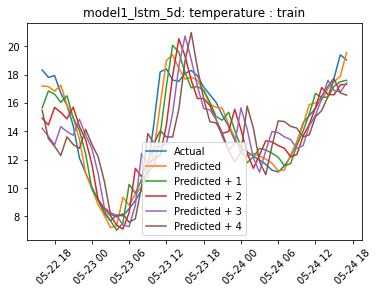

In [88]:
last_range = -50

plt.xticks(rotation=45)
plt.plot(train_results1['Date'][last_range:], train_results1['Actual Temp'][last_range:])
plt.plot(train_results1['Date'][last_range:],train_results1['Pred Temp'][last_range:])

# shift each subsequent predictions
plt.plot(train_results1['Date'][last_range:],train_results1['Pred+1'].shift(1)[last_range:])
plt.plot(train_results1['Date'][last_range:],train_results1['Pred+2'].shift(2)[last_range:])
plt.plot(train_results1['Date'][last_range:],train_results1['Pred+3'].shift(3)[last_range:])
plt.plot(train_results1['Date'][last_range:],train_results1['Pred+4'].shift(4)[last_range:])
plt.legend(['Actual', 
            'Predicted',
            'Predicted + 1',
            'Predicted + 2',
            'Predicted + 3',
            'Predicted + 4'
           ])
plt.title("model1_lstm_5d: temperature : train")